<a href="https://colab.research.google.com/github/joaochenriques/GeneratorCalib/blob/main/FFT_filterResponse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# If running python on Windows operating system, copy the file:
# https://raw.githubusercontent.com/joaochenriques/ipynb_libs/main/mpl_utils.py
# to the working folder before running the notebook
import matplotlib.pyplot as mpl

import pathlib
if not pathlib.Path("mpl_utils.py").exists():
  !curl -O https://raw.githubusercontent.com/joaochenriques/ipynb_libs/main/mpl_utils.py 

import mpl_utils as mut
mut.config_plots()

%config InlineBackend.figure_formats = ['svg']
mpl.rcParams["figure.figsize"] = (6,4.5)

import numpy as np

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3483  100  3483    0     0  17590      0 --:--:-- --:--:-- --:--:-- 17590


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


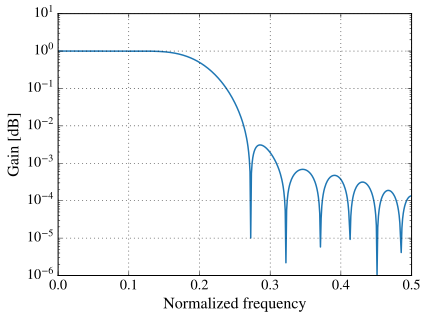

In [2]:
fc = 0.2  # Cutoff frequency as a fraction of the sampling rate (in (0, 0.5)).
N = 25    # Number of coefficients.
L = 1024  # Length of frequency response.
 
# Compute sinc filter with Hamming window.
n = np.arange(N)
h = np.sinc( 2 * fc * (n - (N - 1) / 2) ) * np.hamming(N)
h /= np.sum(h)
 
# Pad filter with zeros.
h_padded = np.zeros(L)
h_padded[0 : N] = h
 
# Compute frequency response; only keep first half.
H = np.abs(np.fft.fft(h_padded))[0 : L // 2 + 1]
 
# Plot frequency response (in dB).
mpl.figure()
mpl.semilogy( np.linspace( 0, 0.5, len(H) ), H)
mpl.xlabel('Normalized frequency')
mpl.ylabel('Gain [dB]')
mpl.ylim([-100, 10])
mpl.grid()
mpl.show()